# Module 3: Dimensionality reduction - Exercise

In this session you will compare both **feature selection** and **feature extraction** for dimensionality reduction, 
but we will still use **Naive Bayes** model.
We will apply these techniques to a real-world [HR Analytics dataset](https://www.kaggle.com/giripujar/hr-analytics).


The overall goal is to predict if an employee would leave the company.

##### NOTE

The goal is the get the best performance from the **Naive Bayes** model using feature reduction techniques. 
We can expect that a different model may be more suitable, 
however we want to only have a single moving part at a time so we will stay with Naive Bayes this week.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import numpy as np
import pandas as pd
np.random.seed(18937)

# Add code below this comment
# to import additional libraries
# and classes (Question #E101)
# ---------------------------
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import FactorAnalysis
from scipy.stats import pearsonr

np.set_printoptions(suppress=True)

# Load dataset

Load dataset into a DataFrame and shuffle.

In [2]:
# Dataset location
DATASET = '/dsa/data/all_datasets/HR_analytics.csv'
assert os.path.exists(DATASET)

# Add code below this comment (Question #E102)
# ---------------------------
dataset = pd.read_csv(DATASET).sample(frac = 1).reset_index(drop=True)
dataset.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Print top 5 rows of the dataset.

In [4]:
# Add code below this comment (Question #E103)
# ---------------------------
dataset.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.85,0.90,5,202,3,0,0,0,IT,low
1,0.12,0.60,2,194,4,0,0,0,technical,medium
2,0.40,0.47,2,136,3,0,1,0,hr,medium
3,0.47,0.55,4,122,5,1,0,0,marketing,medium
4,0.89,0.65,5,195,6,0,1,0,support,low


## Processing

In the dataset, `sales` and `salary` are string columns,
which need some proccessing before we can start feature selection/extraction.

Play with following code and **add comments** to explain based on your understanding.
Feel free to drop questions on disscussion board if you encounter difficulties.

In [3]:
# Add line-by-line comments to explain following code (Question #E104)
# ===============================
encoder = LabelBinarizer()     # stores a function that transforms labels into a binary then stores in a var: encoder
salary_features = encoder.fit_transform(dataset.salary)     # fit to the salary data, transform the salary data via function
                                                            # stored in encoder, then store in var: salary_features
for j, _class in enumerate(encoder.classes_):     # steps through all of the labels stored in classes_
    dataset.loc[:, 'salary_{}'.format(_class)] = salary_features[:, j]     # creates a new attribute salary_LABEL for each
                                                                           # label, and for each row stores a binary value
                                                                           # based on the string stored in salary in each new
                                                                           # attribute

dataset.head()     # prints top five rows of redesigned df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_high,salary_low,salary_medium
0,0.85,0.90,5,202,3,0,0,0,IT,low,0,1,0
1,0.12,0.60,2,194,4,0,0,0,technical,medium,0,0,1
2,0.40,0.47,2,136,3,0,1,0,hr,medium,0,0,1
3,0.47,0.55,4,122,5,1,0,0,marketing,medium,0,0,1
4,0.89,0.65,5,195,6,0,1,0,support,low,0,1,0


In [8]:
# help on fit_transform
help(encoder.fit_transform)

Help on method fit_transform in module sklearn.preprocessing._label:

fit_transform(y) method of sklearn.preprocessing._label.LabelBinarizer instance
    Fit label binarizer and transform multi-class labels to binary
    labels.
    
    The output of transform is sometimes referred to as
    the 1-of-K coding scheme.
    
    Parameters
    ----------
    y : {ndarray, sparse matrix} of shape (n_samples,) or                 (n_samples, n_classes)
        Target values. The 2-d matrix should only contain 0 and 1,
        represents multilabel classification. Sparse matrix can be
        CSR, CSC, COO, DOK, or LIL.
    
    Returns
    -------
    Y : {ndarray, sparse matrix} of shape (n_samples, n_classes)
        Shape will be (n_samples, 1) for binary problems. Sparse matrix
        will be of CSR format.



Now please write similar code for "sales" column like what we just did above. Feel free to drop questions on disscussion board if you need clarification.

In [4]:
# Add code below this comment (Question #E105)
# ---------------------------
encoder = LabelBinarizer()
sales_features = encoder.fit_transform(dataset.sales)
for j, _class in enumerate(encoder.classes_):
    dataset.loc[:, 'sales_{}'.format(_class)] = sales_features[:, j]
# ---------------------------

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_high            14999 non-null  int64  
 11  salary_low             14999 non-null  int64  
 12  salary_medium          14999 non-null  int64  
 13  sales_IT               14999 non-null  int64  
 14  sales_RandD            14999 non-null  int64  
 15  sa

Store feature columns (all columns except 'left', 'sales' and 'salary') to a new variable **X**. Here `left` is the class variable.

Store column(s) to be predicted into a new variable **y**.

In [5]:
# Add code below this comment (Question #E106)
# ---------------------------
X = dataset.iloc[:, [0,1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19,20,21,22]]
y = dataset.left

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary_high            14999 non-null  int64  
 8   salary_low             14999 non-null  int64  
 9   salary_medium          14999 non-null  int64  
 10  sales_IT               14999 non-null  int64  
 11  sales_RandD            14999 non-null  int64  
 12  sales_accounting       14999 non-null  int64  
 13  sales_hr               14999 non-null  int64  
 14  sales_management       14999 non-null  int64  
 15  sa

Create train/validate split (20% validation ratio) and use variable names: **X_train, X_test, y_train, y_test**.

In [6]:
# Add code below this comment (Question #E107)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Feature selection and evaluation

In this section you could make use of any method so far introduced or provided by sklearn for **feature selection**.

Steps:
1. Initialize a feature selector
2. Fit feature selector on training set
3. Print indices of features selected, the "support".
4. Train a Gaussian Naive Bayes model on selected features from training set.
5. Evaluate the model by measuring its accuracy on the test set.

Please **briefly answer the 2 questions** at the end of this section; use evidence printed from your code as appropiate to support your answer. 

It is not required but if you are comparing different feature selection methods,
please add new notebook cells for each method.

In [64]:
# Train a Gaussian Naive Bayes model without feature selection for comparison
model = GaussianNB()
model.fit(X_train, y_train)

print('No feature selection score', model.score(X_test, y_test))


No feature selection score 0.646


In [85]:
# Add code below this comment (Question #E108)
# ---------------------------
# Initialize selector and fit to trainining datasets
selector = SelectKBest(chi2, k = 3)
selector.fit(X_train, y_train)

# Transform the training and testing data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train a Gaussian Naive Bayes model on selected features from training set
model = GaussianNB()
model.fit(X_train_selected, y_train)

# Print indices of selected features
print('Indices of selected features', selector.get_support(True))
print('\nColumns selected', [dataset.columns[i] for i in selector.get_support(True)])
# Print χ² statistic and score with feature selection
print('\nχ² statistic', np.round(selector.scores_, 5))
#print('χ² statistic', selector.scores_.sort())
print('\nWith feature selection score', round(model.score(X_test_selected, y_test),4))


Indices of selected features [0 3 5]
Columns selected ['satisfaction_level', 'average_montly_hours', 'Work_accident']
χ² statistic [180.17112   0.03558   1.57185 686.93418 150.14868 249.22351  49.77982
 165.47964 104.98695  28.46025   2.59899  23.02586   3.72339  10.54318
  35.1673    0.00294   0.29504   0.63056   2.67216   2.80088]
With feature selection score 0.7893


How many number of features did you finally choose? Why?

# Feature extraction

In this section you could use **Principle Component Analysis** or **Factor Analysis** for feature extraction.

Steps:
1. Initialize either PCA or FactorAnalysis
2. Fit feature extractor on training set.
4. Train a Gaussian Naive Bayes model on selected features from training set.
5. Evaluate the model by measuring its accuracy on the test set.

In [17]:
# Add code below this comment (Question #E110)
# ---------------------------
# Initialize factor analysis and fit extractor to trainining datasets
fa = FactorAnalysis(n_components = 5)
fa.fit(X_train, y_train)

# Transform the training and testing data
X_train_selected = fa.transform(X_train)
X_test_selected = fa.transform(X_test)

# Compute explained variance ratio
def FA_explained_variance_ratio(fa):
    fa.explained_variance_ = np.flip(np.sort(np.sum(fa.components_**2, axis = 1)), axis = 0)
    total_variance = np.sum(fa.explained_variance_) + np.sum(fa.noise_variance_)
    fa.explained_variance_ratio_ = fa.explained_variance_ / total_variance

FA_explained_variance_ratio(fa)

# Compute correlation coefficients
X_FA = fa.transform(X)

# Train Gaussian Naive Bayes model on selected features
model = GaussianNB()
model.fit(X_train_selected, y_train)

print('Explained variance ratios', fa.explained_variance_ratio_)
print('\nCorrelation coefficients', [pearsonr(X_FA[:,i], y)[0] for i in range(X_FA.shape[1])])
print('\nWith feature selection score', round(model.score(X_test_selected, y_test),4))


Explained variance ratios [0.99733798 0.00033129 0.00026324 0.00021969 0.00008845]

Correlation coefficients [-0.10674780172236543, -0.11851018404754433, 0.07019134317679761, 0.004415182813347927, 0.0418526695052935]

With feature selection score 0.76


Create a scree plot of **explained variance ratio** for extracted features.

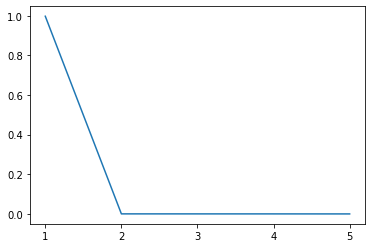

In [10]:
# Add code below this comment (Question #E111)
# ---------------------------
x_ticks = np.arange(len(fa.components_))+1
plt.xticks(x_ticks)
plt.plot(x_ticks, fa.explained_variance_ratio_)


Do you think this feature extraction method performed satisfactorily?
How does it compare to feature selection methods in terms of effectiveness?

How would you explain the features you have extracted to somebody without a data science background if you were to recommend this method?
(short answer)

# Save your notebook!  Then `File > Close and Halt`